In [2]:
## 肆、1.資料整理
import pandas as pd
import numpy as np
data_df = pd.read_csv("D:/survey lung cancer.csv")
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PRESSURE               309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

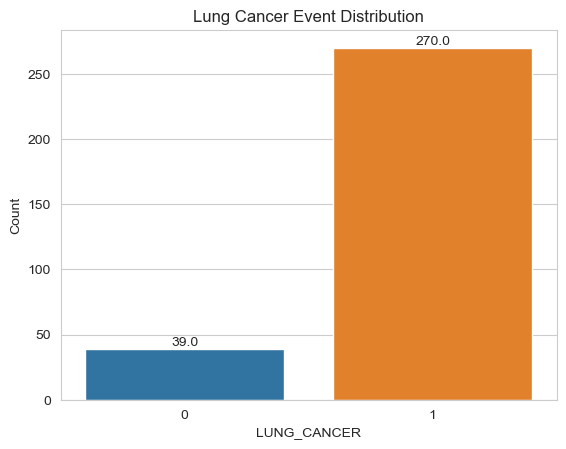

1    270
0     39
Name: LUNG_CANCER, dtype: int64


In [3]:
## 肆、2.目標值分析
import matplotlib.pyplot as plt
import seaborn as sns
# 設置圖表樣式為白色格線
sns.set_style("whitegrid")
# 目標值頻率計算
target_counts = data_df['LUNG_CANCER'].value_counts()
# 目標值分布圖表
ax = sns.countplot(x='LUNG_CANCER', data=data_df)
# 在柱狀圖上顯示數值
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.title('Lung Cancer Event Distribution')
plt.xlabel('LUNG_CANCER')
plt.ylabel('Count')
plt.show()
print(target_counts)

In [20]:
## 肆、3.區分訓練集和測試集
from sklearn.model_selection import train_test_split
# 將特徵變數存儲在 X 中
X = data_df.drop('LUNG_CANCER', axis=1)
# 將目標變數存儲在 y 中
y = data_df['LUNG_CANCER']
# 分割資料集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 計算測試集佔全部資料的百分比
test_percentage = len(X_test) / len(data_df) * 100
# 打印訓練集和測試集的筆數
print("訓練集的筆數:", len(X_train))
print("測試集的筆數:", len(X_test))
# 打印測試集佔全部資料的百分比
print("測試集佔全部資料的百分比:", test_percentage)

訓練集的筆數: 247
測試集的筆數: 62
測試集佔全部資料的百分比: 20.06472491909385


In [52]:
## 1.基於患者的臨床特徵，我們可以預測其是否患有肺癌？
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
# 讀取資料集
data_df = pd.read_csv("D:/survey lung cancer.csv")
# 定義特徵變數 X 和目標變數 y
X = data_df.drop('LUNG_CANCER', axis=1)
y = data_df['LUNG_CANCER']
# 分割資料集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 建立隨機森林分類模型
model = RandomForestClassifier(n_estimators=100)
# 訓練模型並預測測試集
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# 計算預測準確率
accuracy = accuracy_score(y_test, y_pred)
# 評估模型
classification_rep = classification_report(y_test, y_pred)
# 輸出結果
print("預測準確率:", accuracy)
print("分類報告：")
print(classification_rep)

預測準確率: 0.967741935483871
分類報告：
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



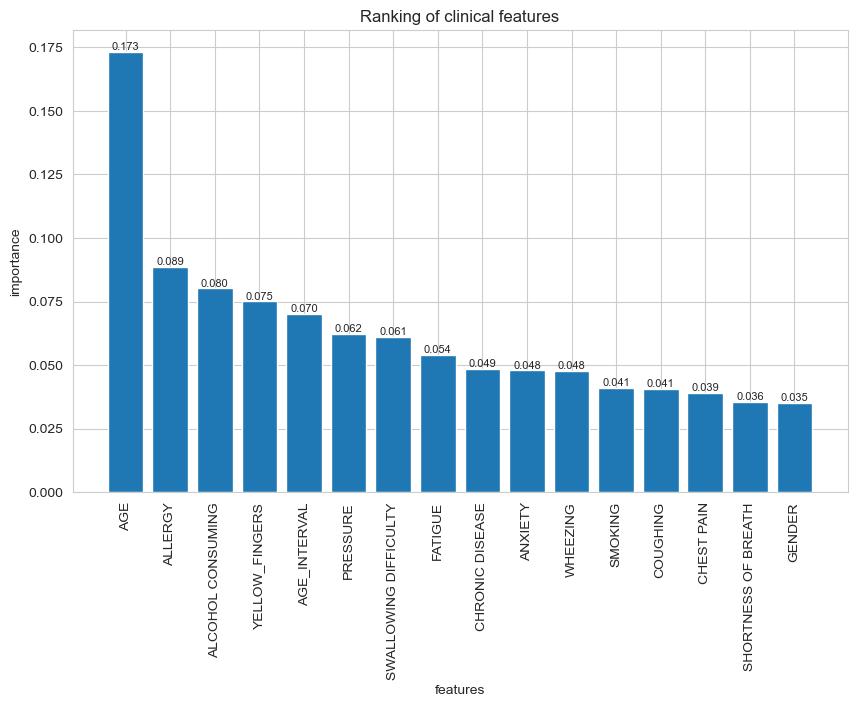

In [82]:
## 2.各臨床指標對預測肺癌的重要程度？
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
# 定義特徵變數 X 和目標變數 y
X = data_df.drop('LUNG_CANCER', axis=1)
y = data_df['LUNG_CANCER']
# 建立隨機森林分類模型並訓練
model = RandomForestClassifier(n_estimators=100).fit(X, y)
# 獲取特徵重要性並排序
importance_df = pd.DataFrame({'features': X.columns, 'importance': model.feature_importances_})
importance_df = importance_df.sort_values('importance', ascending=False)
# 使用長條圖顯示臨床特徵的重要性排序結果
plt.figure(figsize=(10, 6))
plt.bar(importance_df['features'], importance_df['importance'])
plt.title('Ranking of clinical features')
plt.xlabel('features')
plt.ylabel('importance')
plt.xticks(rotation=90)
# 在每個長條上顯示數值
for i, v in enumerate(importance_df['importance']):
    plt.text(i, v, f"{v:.3f}", ha='center', va='bottom', fontsize=8)
plt.show()

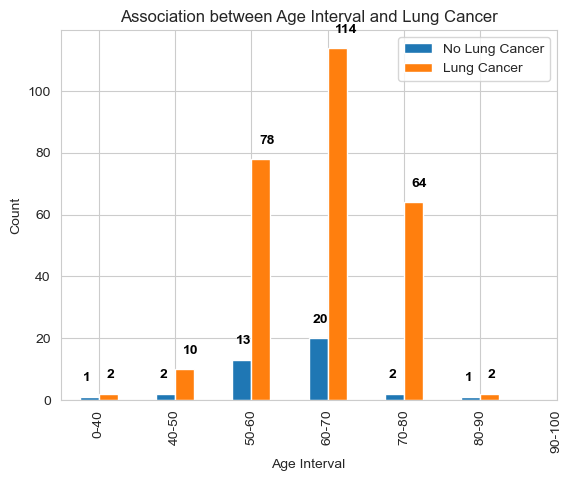

In [83]:
## 3.年齡區間與肺癌發生率之間是否有關聯？
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
# 定義年齡區間的分段
age_bins = [0, 40, 50, 60, 70, 80, 90, 100]
# 將年齡分類為各個區間
data_df['AGE_INTERVAL'] = pd.cut(data_df['AGE'], bins=age_bins, labels=False, right=False)
# 選擇相關欄位進行分析
age_interval = data_df['AGE_INTERVAL']  # 年齡區間
lung_cancer = data_df['LUNG_CANCER']  # 肺癌
# 繪製列聯表的長條圖
ax = contingency_table.plot(kind='bar')
plt.xlabel('Age Interval')
plt.ylabel('Count')
plt.title('Association between Age Interval and Lung Cancer')
plt.legend(['No Lung Cancer', 'Lung Cancer'])
# 取得年齡區間的標籤
age_interval_labels = [f'{age_bins[i]}-{age_bins[i+1]}' for i in range(len(age_bins)-1)]
# 將 x 軸刻度標籤設定為年齡區間
plt.xticks(range(len(age_interval_labels)), age_interval_labels)
# 在每個長條圖上加上數值
for i, (no_lung_cancer, lung_cancer) in enumerate(zip(contingency_table[0], contingency_table[1])):
    ax.text(i-0.2, no_lung_cancer + 5, str(no_lung_cancer), color='black', fontweight='bold')
    ax.text(i+0.1, lung_cancer + 5, str(lung_cancer), color='black', fontweight='bold')
# 顯示圖表
plt.show()

預測準確率: 0.967741935483871
分類報告:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.97      1.00      0.98        60

    accuracy                           0.97        62
   macro avg       0.48      0.50      0.49        62
weighted avg       0.94      0.97      0.95        62



C:\Users\andy5\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andy5\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andy5\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


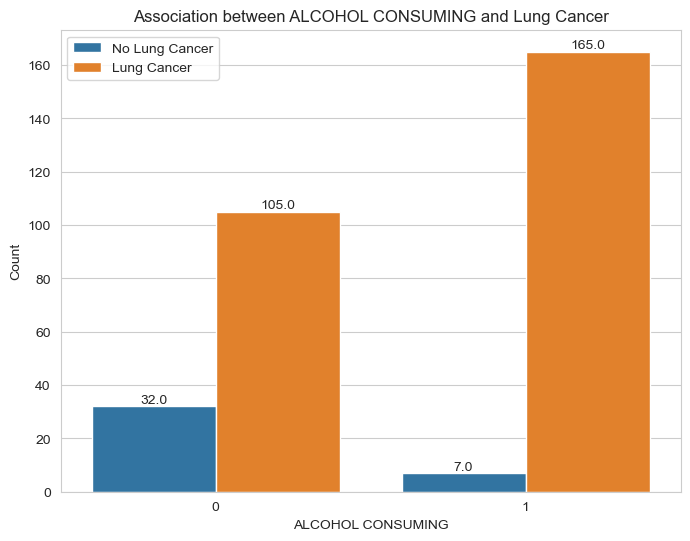

In [92]:
## 4.喝酒習慣與肺癌之間存在關聯？
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# 選擇相關特徵作為預測變數
features = ['ALCOHOL CONSUMING']
# 將特徵變數和目標變數分割為訓練集和測試集
X = data_df[features]
y = data_df['LUNG_CANCER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 建立邏輯回歸模型
logreg_model = LogisticRegression()
# 在訓練集上擬合模型並進行預測
logreg_model.fit(X_train, y_train)
y_pred = logreg_model.predict(X_test)
# 計算準確率
accuracy = accuracy_score(y_test, y_pred)
print("預測準確率:", accuracy)
# 顯示分類報告
classification_rep = classification_report(y_test, y_pred)
print("分類報告:")
print(classification_rep)
# 以圖表顯示不同喝酒習慣的人數和肺癌發生率之間的關係
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='ALCOHOL CONSUMING', hue='LUNG_CANCER', data=data_df)
plt.xlabel('ALCOHOL CONSUMING')
plt.ylabel('Count')
plt.title('Association between ALCOHOL CONSUMING and Lung Cancer')
plt.legend(['No Lung Cancer', 'Lung Cancer'])
# 在圖表上顯示數值
for p in ax.patches:
    count = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(count, (x, y), ha='center', va='bottom')
plt.show()

預測準確率: 0.967741935483871
分類報告:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.97      1.00      0.98        60

    accuracy                           0.97        62
   macro avg       0.48      0.50      0.49        62
weighted avg       0.94      0.97      0.95        62

AUC值: 0.16666666666666666


C:\Users\andy5\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andy5\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andy5\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


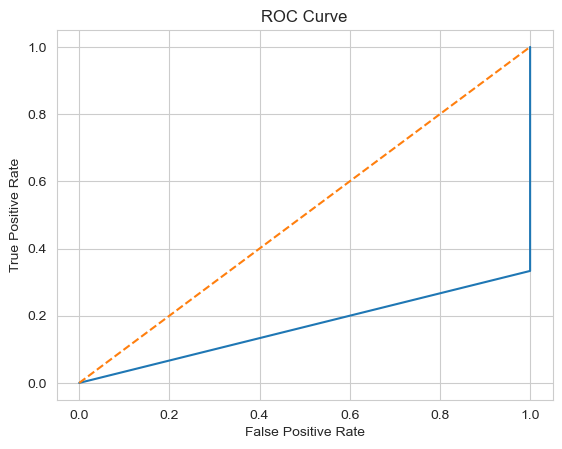

In [100]:
## 5.過敏與肺癌之間是否有存在關聯？
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
# 選擇相關特徵作為預測變數
features = ['ALLERGY']
X = data_df[features]
y = data_df['LUNG_CANCER']
# 將特徵變數和目標變數分割為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 建立支持向量機模型
svm_model = SVC(probability=True)
# 在訓練集上擬合模型並進行預測
svm_model.fit(X_train, y_train)
y_pred_scores = svm_model.decision_function(X_test)
y_pred_proba = (y_pred_scores - y_pred_scores.min()) / (y_pred_scores.max() - y_pred_scores.min())
# 計算準確率
accuracy = accuracy_score(y_test, y_pred)
print("預測準確率:", accuracy)
# 顯示分類報告
classification_rep = classification_report(y_test, y_pred)
print("分類報告:")
print(classification_rep)
# 計算AUC值
auc_score = roc_auc_score(y_test, y_pred_proba)
print("AUC值:", auc_score)
# 繪製ROC曲線
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()